<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_OB/blob/Week_4/customers_clustering_k_means_dbscan_and_ap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall Customer Segmentation**
- 이 프로젝트는 기계 학습 알고리즘을 사용하여 쇼핑몰 고객을 세분화하는 방법을 보여줌
  - 비지도 클러스터링 문제
  - 세 가지 인기 있는 알고리즘인 **KMeans**, **Affinity Propagation** 및 **DBSCAN**을 제시하고 비교





# **1. Introduction**
- 클러스터링의 주요 작업은 레이블이 없는 데이터 집합 내에서 "자연스러운" 그룹을 발견하는 것임
  - 비지도 학습 작업이라는 것을 의미
- 클러스터링의 주요 활용 분야
  - 고객 세분화 (효율적인 마케팅을 위해)
  - 이미지 세분화
  - 문서 클러스터링
- 클러스터링 알고리즘은 두 가지 주요 유형으로 나눌 수 있음
  - <u>계층적</u> 알고리즘
    - 데이터 집합을 하위 집합으로 재귀적으로 분할 -> 하나의 항목만 포함하는 하위 집합이 될 때까지 반복
    - 이를 나무 모양으로 나타낼 수 있음 => **덴드로그램**
    - 이를 만들 때는 잎에서 뿌리로(집합적인 방법) 또는 뿌리에서 잎으로(분할적인 방법) 생성할 수 있음
    - 계층적 클러스터링에서는 클러스터의 수를 명시적으로 지정할 필요가 없음
      - 그러나 분할/병합 프로세스의 종료 조건을 정의해야 함
  - <u>파티션</u> 알고리즘  
    - 주어진 기준에 따라 데이터 집합을 여러 하위 집합(클러스터)으로 나눔
    - 일부 알고리즘에서는 클러스터의 수를 사전에 정의해야 하고(예: K-Means), 또 일부 알고리즘에서는 정의할 필요가 없음(DBSCAN)
      - 알고리즘을 실행하기 전에 클러스터의 수를 정의하는 것은 종종 많은 응용 프로그램에서 도메인 지식이 필요하며 이는 많은 응용 분야에서 어려운 경우가 있음
      => 도메인 지식이 없는 분석가가 적절한 클러스터 수를 선택하는 데 도움이 되는 다양한 휴리스틱 및 단순화된 접근 방식이 개발됨


# **2. Reading data**
- 원본 데이터 불러오기
- 원본 데이터 검토
- 데이터 클렌징

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.5.3
numpy version: 1.23.5
seaborn version: 0.12.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
mall_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/OB/4주차/Mall_Customers.csv')

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


In [4]:
mall_data.sample(10) # 10개의 대표 데이터 확인하기

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
100,101,Female,23,62,41
34,35,Female,49,33,14
194,195,Female,47,120,16
86,87,Female,55,57,58
108,109,Male,68,63,43
178,179,Male,59,93,14
168,169,Female,36,87,27
179,180,Male,35,93,90
80,81,Male,57,54,51
54,55,Female,50,43,45


In [5]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## **📌 Data Description**
* `Customer ID` - 고객별 고유 숫자(integer)
* `Gender` - 이진 변수(Male/Female), 범주형 변수
* `Age` - 수치형 변수, integer
* `Annual Income (k$)` - 수치형 변수, integer
* `Spending Score (1-100)` - 수치형 변수, integer


- 하나의 범주형 변수가 포함되어 있음
  - ```gender```
  - One-hot Encoding을 수행하는 것이 권장됨
    - 기술적으로 가능하다면
    - 원칙적으로 막혀있지 않다면
    - 딱히 범주형 변수를 남겨두는 것이 권장되지는 않으므로

- 그러나 해당 경우에는 여러 이유로 인해 범주형 변수를 그대로 유지


In [6]:
# 기초통계량 확인

mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# 결측값 확인

mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- 다행히 결측치가 없음을 확인할 수 있다.

# **3. Exploratory Data Analysis**
- 주어진 데이터에 대한 기초적인 통계 조사
- 데이터에 대한 이해도 증가
- 두 가지 주요 사항  
  1) 분포  
  2) 상관관계  


## **3.1 Distributions**
- 수치형 변수들의 분포 파악
  - 유일한 범주형 변수인 ```gender```에 따라 분류될 예장

### **a. Age**

<ipython-input-8-dbc1328cbc57>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-8-dbc1328cbc57>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_age, bins=age_bins, kd

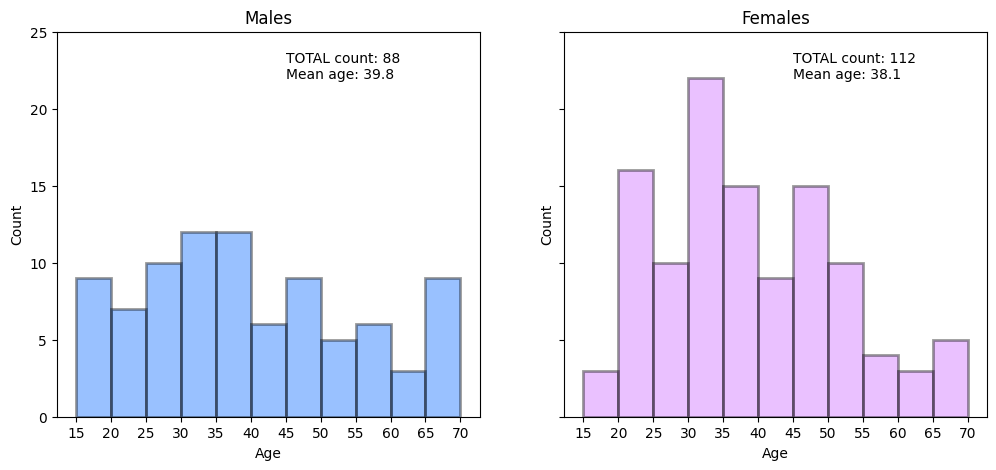

In [8]:
males_age = mall_data[mall_data['Gender']=='Male']['Age'] # 남성으로 분류
females_age = mall_data[mall_data['Gender']=='Female']['Age'] # 여성으로 분류

age_bins = range(15,75,5)

## histogram으로 시각화
# 남성
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# 여성
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [9]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


- 남성의 평균 나이가 여성에 비해 약간 더 높음(39.8 vs 38.1)
- 남성의 나이 분포가 여성에 비해 조금 더 정규 분포에 가까움
  - Kolgomorov-Smirnov test를 통해 두 집단의 분포에 차이가 있음을 확인 가능

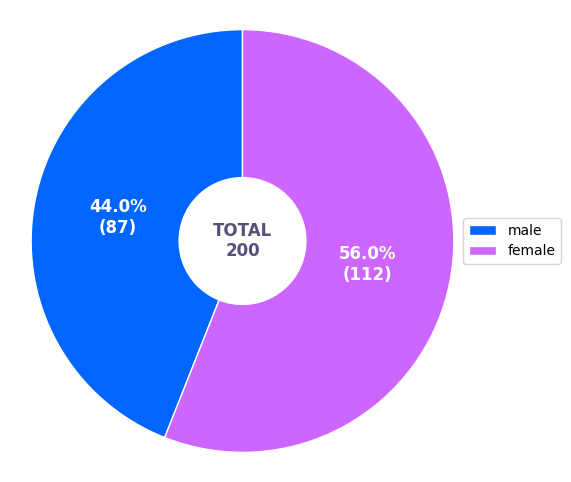

In [10]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

- 남성 고객에 비해 여성 고객이 조금 더 많은 것을 확인할 수 있다.

### **b) Income**

<ipython-input-11-eb20ecd2b3c8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-11-eb20ecd2b3c8>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_income, bins=my_bi

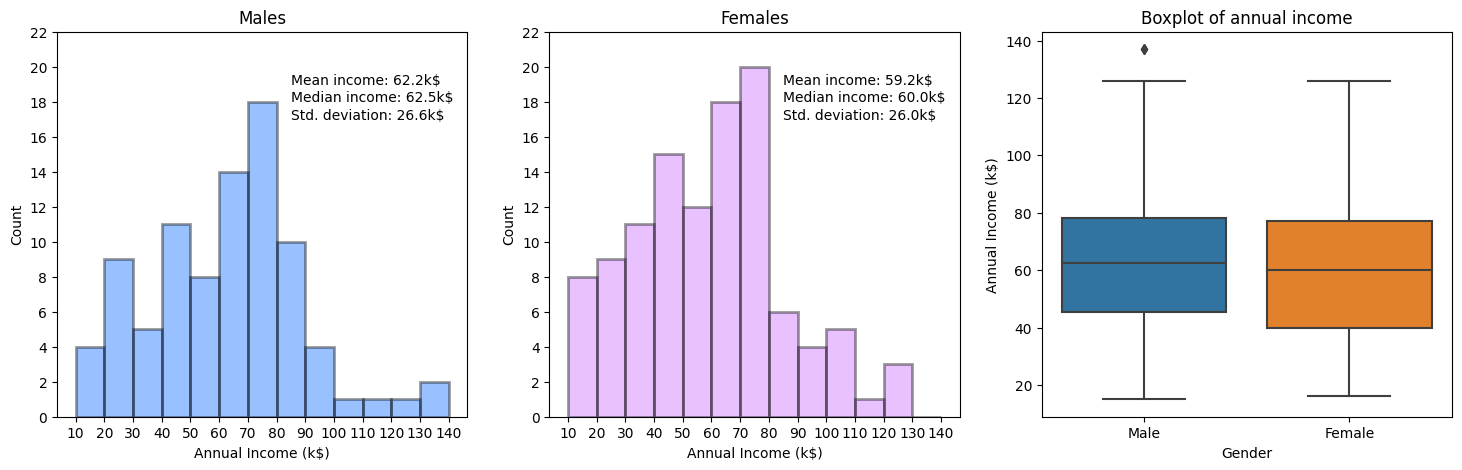

In [11]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # 남성
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # 여성

my_bins = range(10,150,10)

# males
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [12]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


- 평균과 중앙값 모두 남성이 여성에 비해 높다.
- 두 집단의 표준 편차는 비슷한 양상을 보임
- 남성 집단에서 하나의 이상치가 존재함
- K-S test에 의하면 두 집단 간의 차이는 두드러지지 않음

### **c) Spending Score**

<ipython-input-13-72723e29da30>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-13-72723e29da30>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_spending, 

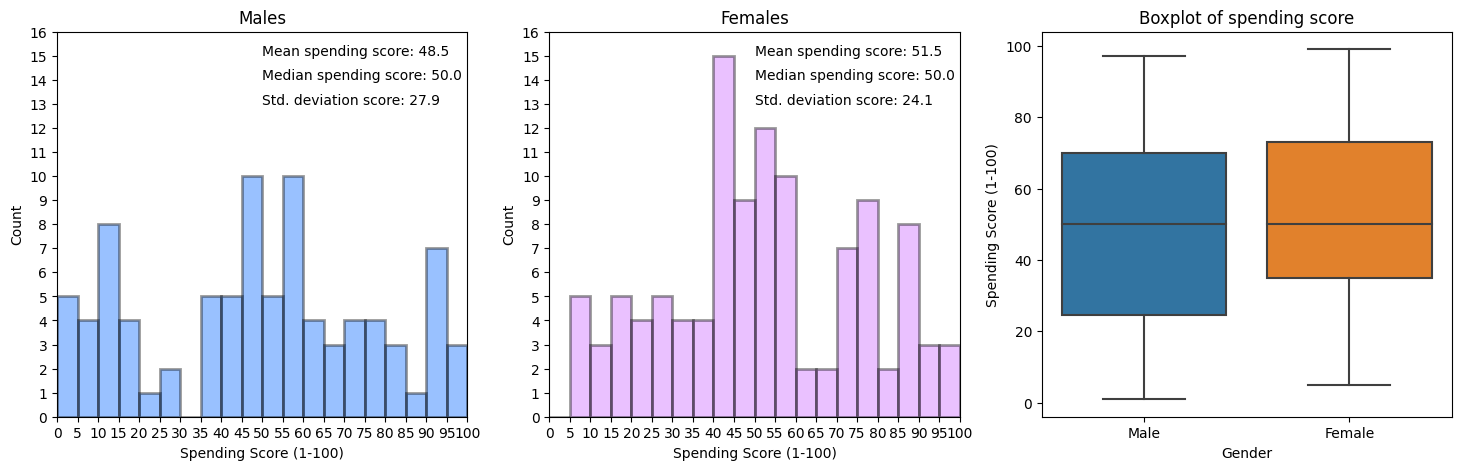

In [13]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] # subset with males Spending score
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] # subset with females Spending Score

spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

In [14]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


- Spending Score의 경우 남성에 비해 여성이 더 높다.
- K-S test에 의하면, H0을 기각할 근거는 없음(H0: 남녀의 차이가 없다.)


In [15]:
## 각 연령대에 따른 연간 수입 중앙값

medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

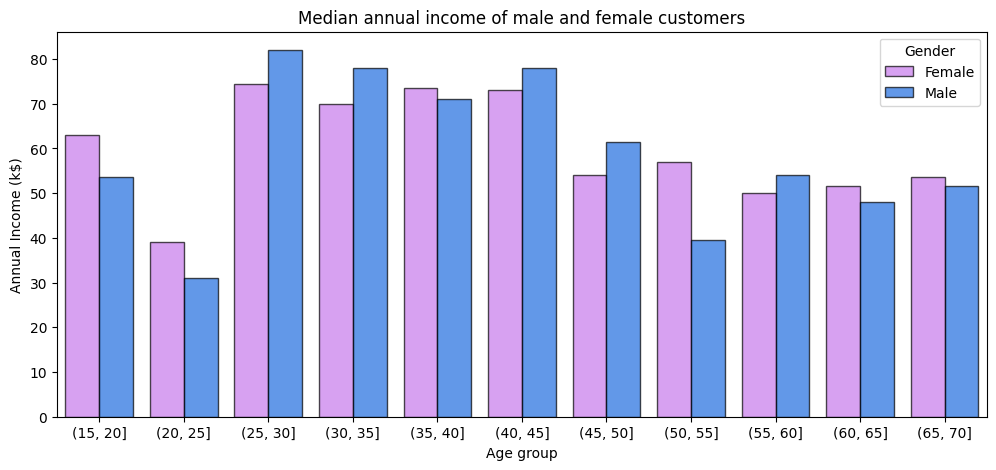

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

- 가장 부유한 고객은 25-45세 연령대의 고객들임
- 남녀 간 가장 큰 차이를 보이는 그룹
  - 25세 ~ 30세(남성 > 여성)
  - 50세 ~ 55세(여성 > 남성)

## **3.2 Correlations**
- 수치형 변수들 간의 상관관계 파악하기

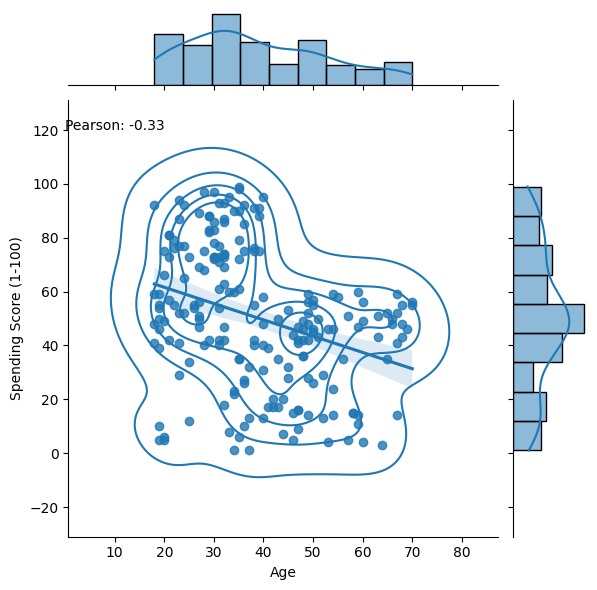

In [17]:
from scipy.stats import pearsonr

## 나이와 소비점수 간의 상관관계
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data,
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)


plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

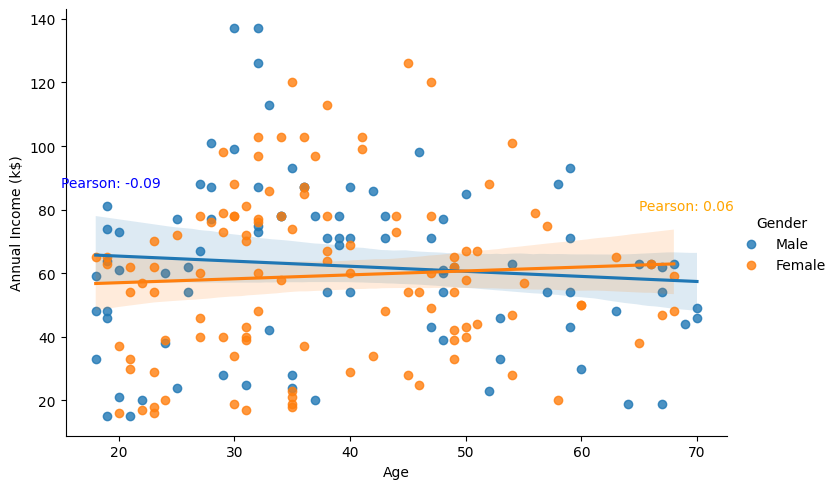

In [18]:
## 나이와 소득 간의 상관관계

corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x='Age', y='Annual Income (k$)', data=mall_data, hue='Gender', aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

- 두 성별 모두 ```age```와 ```income```의 상관관계는 무시할 만한 수준이다.
  - 상관관계가 거의 x

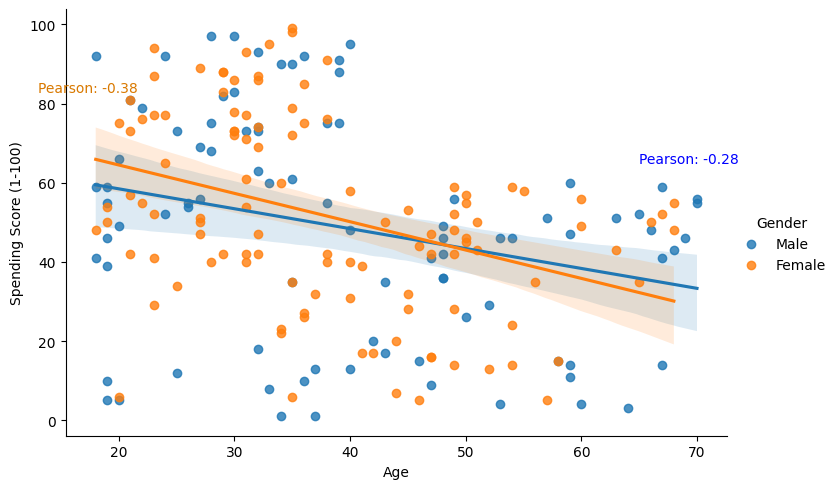

In [19]:
## 나이와 소비 점수 간 상관관계

corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x='Age', y='Spending Score (1-100)', data=mall_data, hue='Gender', aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

- 나이와 소비점수 간 약한 상관관계가 있다.

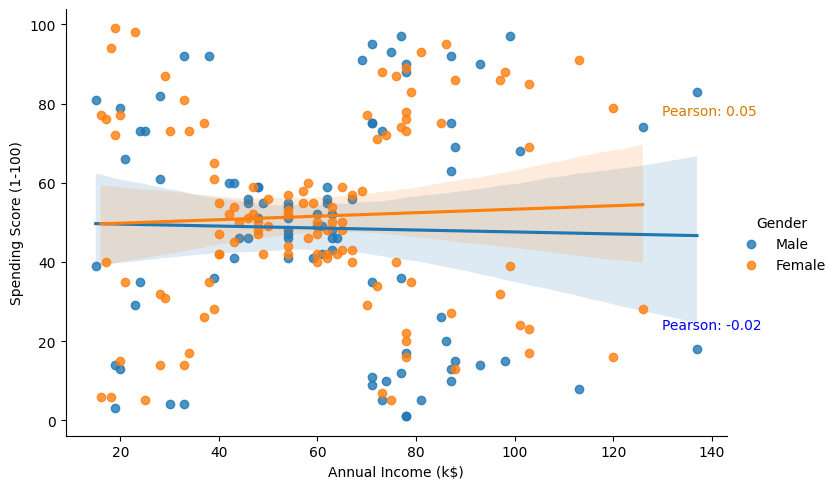

In [20]:
## 수입과 소비점수 간 상관관계

corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_data, hue='Gender', aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

- 수입과 소비 점수 간에는 상관관계가 거의 없다.
  - 무시할 만한 수준의 상관계수

# **4. 군집화**
- 다음 3가지 군집화 방법을 활용할 예정
  - KMeans
  - DBSCAN
  - Affinity Propagation
- 일반적으로 군집화 시에는 표준화를 통한 데이터 스케일링을 진행함
  - 현재 경우는 진행하지 않을 예정

## **4-1. K-Means**

### **4-1-1. 설명**

- NP-hard 문제로 알려져 있으며, 탐욕 알고리즘이며 지역 최소값으로 수렴
  - K-Means 알고리즘의 계산 비용은 **O(kn)**
    - k: 클러스터의 수, n: 샘플의 수
  - 다른 클러스터링 알고리즘과 비교할 때 나쁘지 않음
  - 대개 지역 최소값으로 수렴하더라도 K-Means는 비교적 빠르며 그룹이 서로 잘 격리되어 있을 때 전역 최소값으로 수렴하는 경우가 많음
- 클러스터링 결과는 초기화 기준에 따라 달라짐 => 다양한 초기화 지점에서 분석을 실행하고 결과 관성이 가장 낮은 것을 선택하는 것이 일반적임
---

- 주요 매개변수
1. **초기화 기준**  
- Scikit-learn에서는 ```k-means++```이라는 초기화 방법이 구현되어 있음
  - 일반적으로 서로 먼 초기 중심점을 생성하여 더 나은 결과를 얻을 확률을 높임
- 또한 무작위 점 생성기를 사용할 수도 있음

2. **클러스터 수**  
- 클러스터 수를 선택하는 것은 이 알고리즘 설정의 가장 어려운 부분임
  - 엄격한 수학적 기준은 없으며 다양한 휴리스틱/단순화된 접근 방식이 개발됨
- 가장 간단하고 널리 사용되는 방법 중 하나는 **엘보우 방법**임
  - 또한 **실루엣 점수**도 사용됨
- 또한 최적의 클러스터 수를 선택하기 위한 다른 고급 옵션도 있음
  - 최소 메시지 길이 (MML)
  - 최소 설명 길이 (MDL)
  - 베이즈 정보 기준 (BIC)
  - 아카이케 정보 기준 (AIC)
  - 디리클레 프로세스
  - 갭 통계량

3. **거리 측정(Scikit Learn 구현에서는 필수 아님)**  
- 점 사이의 거리를 계산하는 다양한 옵션이 있음
  - 가장 인기 있는 것은 간단히 **유클리드 거리** 측정(scikit-learn 구현)
- 이를 종종 구면 K-Means 모델이라고 함
  - 이 모델은 주로 구 모양의 그룹만 찾으며 고차원 분석에서 팽창되기 쉬움  
  ("차원의 저주"라고 함)
- 다른 거리 측정법
  - Mahalonobis 거리 (고비용)
  - Itakura-Saito 거리
  - L1 거리
  - 코사인 거리
  - Bregman 거리
---

- K-Means에 관한 몇 가지 핵심 사항
1. 유클리드 거리가 사용됨
2. 알고리즘을 위해 클러스터 수를 정의해야 함
3. 중심점은 클러스터 멤버까지의 평균 거리를 사용하여 계산됨
4. 클러스터는 등방성 및 볼록으로 가정됨
5. 확률적 알고리즘 -> 초기화 기준에 따라 결과가 달라짐
6. 등분산의 그룹을 생성함(관성을 최소화)
7. "차원의 저주"에 취약함
8. 병렬로 실행 가능하여 확장성이 높음

### **4-1-2. 적용**

In [21]:
from sklearn.cluster import KMeans

- 해당 경우에는 오직 **수치형** 변수만을 활용해 clustering 할 예정

In [22]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # 수치형 변수만 저장

- 적절한 군집 개수 찾기
  - Elbow method 활용

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

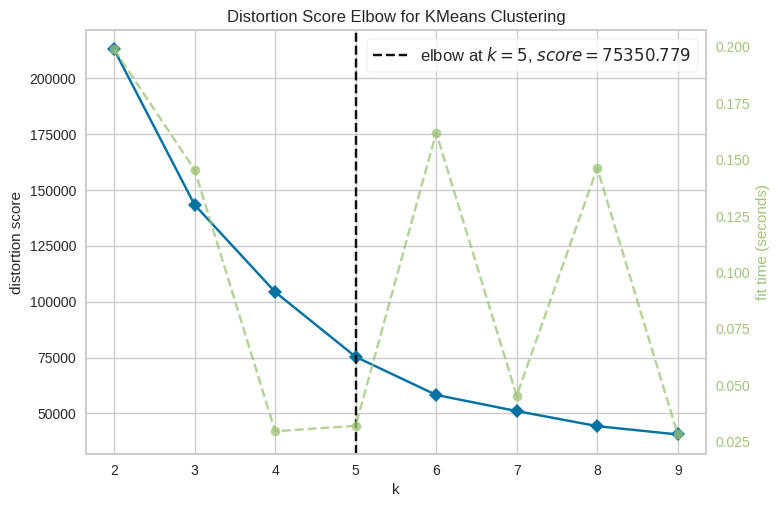

In [23]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

- Elbow Method를 통해 적절한 cluster 개수를 선택하기에는 명확하지 않음
  - 대략 5개 또는 6개 군집이 적절해 보임
- 다른 대안으로 실루엣 계수를 활용하여 적절한 군집 개수를 선택해 보자!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

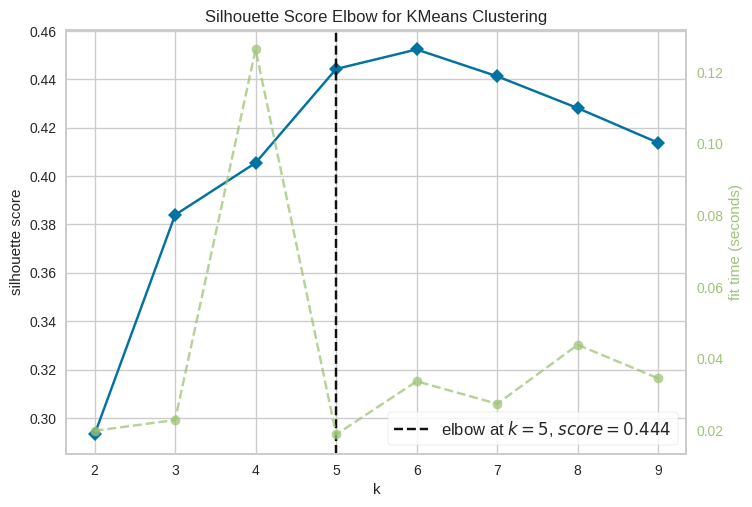

In [24]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

- 실루엣 계수를 통해 측정해 보아도 5개 또는 6개가 적절해 보인다.

#### **5개**

In [25]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


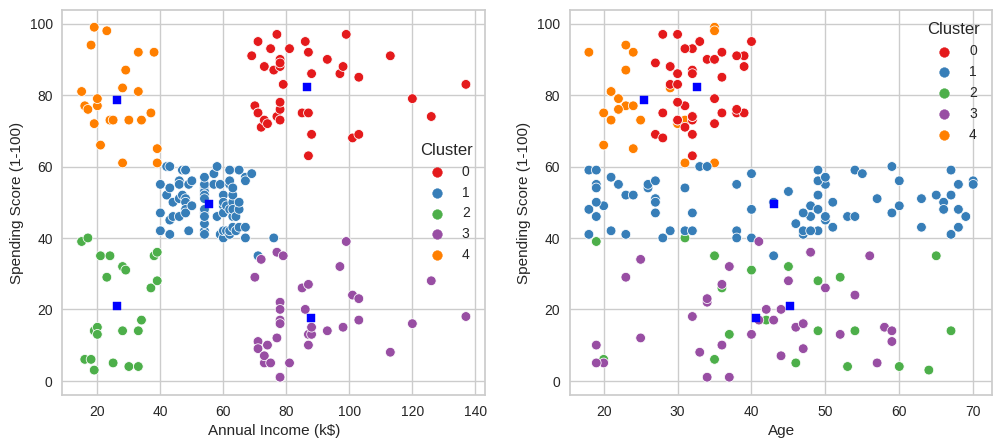

In [26]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

- K-Means 알고리즘은 다음과 같은 5개의 클러스터를 생성함:
  - 연간 소득이 **낮고** 소비 점수가 **높은** 고객들
  - 연간 소득이 **중간**이고 소비 점수가 **중간**인 고객들
  - 연간 소득이 **높고** 소비 점수가 **낮은** 고객들
  - 연간 소득이 **높고** 소비 점수가 **높은** 고객들
  - 연간 소득이 **낮고** 소비 점수가 **낮은** 고객들

-고객들의 연령에 대한 명확한 그룹은 없음

##### **클러스터 간의 크기 비교**

In [27]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,39
1,79
2,23
3,36
4,23


- 가장 큰 클러스터는 1번 클러스터로 79개의 관측값("중간-중간" 고객)이 있음
- 가장 작은 두 개의 클러스터는 각각 23개의 관측값을 포함하고 있음
  - 클러스터 2
  - 클러스터 4


##### **3차원 시각화**

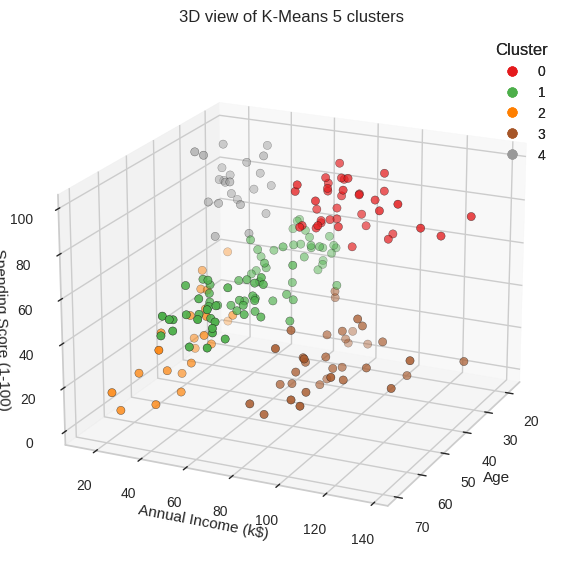

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d', elev=20, azim=210)
scatter = ax.scatter(KM5_clustered['Age'],
                     KM5_clustered['Annual Income (k$)'],
                     KM5_clustered['Spending Score (1-100)'],
                     c=KM5_clustered['Cluster'],
                     s = 35, edgecolor = 'k', cmap = plt.cm.Set1)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.azim = 25

# Create a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)

plt.show()

In [29]:
## Plotly를 활용한 3D 시각화

import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

##### **실루엣 계수 시각화**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



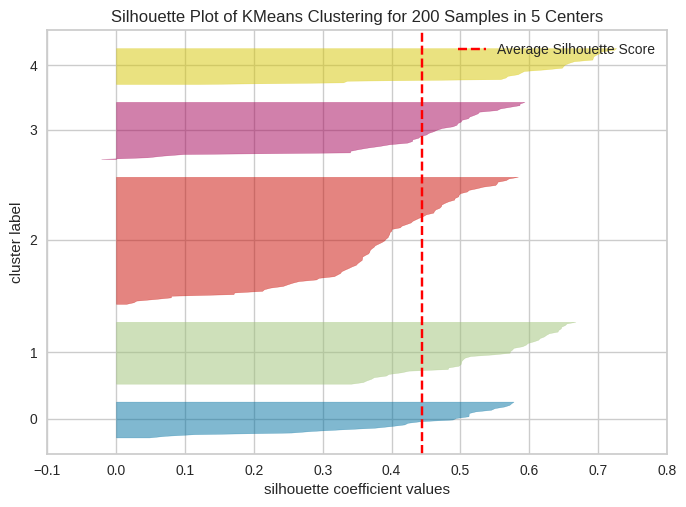

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters = 5, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

#### **6개**

In [31]:
KM_6_clusters = KMeans(n_clusters = 6, init = 'k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



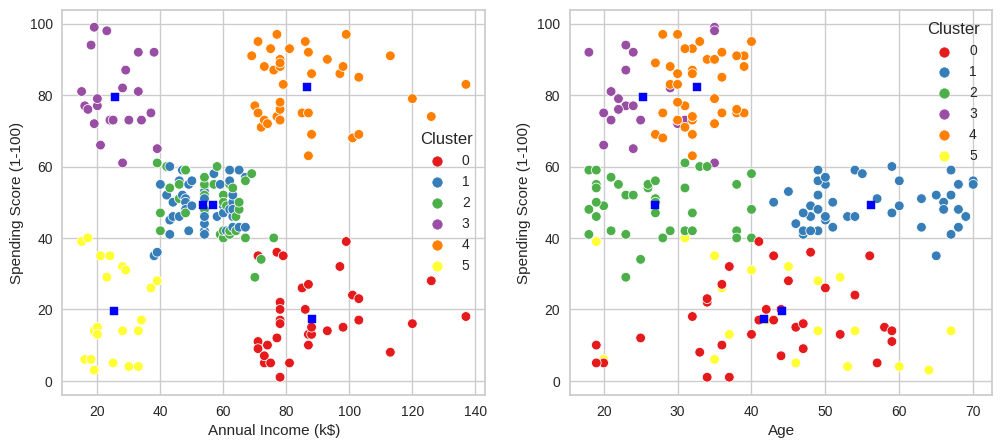

In [33]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')


# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

- K-Means 알고리즘은 다음과 같은 6개의 클러스터를 생성함:
  - **중간** 연간 소득 및 **중간** 소비 점수를 가진 젊은 고객들
  - **높은** 연간 소득 및 **낮은** 소비 점수를 가진 고객들
  - **중간** 연간 소득 및 **중간** 소비 점수를 가진 젊은 고객들
  - **높은** 연간 소득 및 **높은** 소비 점수를 가진 고객들
  - **낮은** 연간 소득 및 **낮은** 소비 점수를 가진 고객들
  - **낮은** 연간 소득 및 **높은** 소비 점수를 가진 고객들
- 고객 연령에 대한 명확한 그룹은 없습니다.

In [34]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,35
1,45
2,38
3,22
4,39
5,21


In [35]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



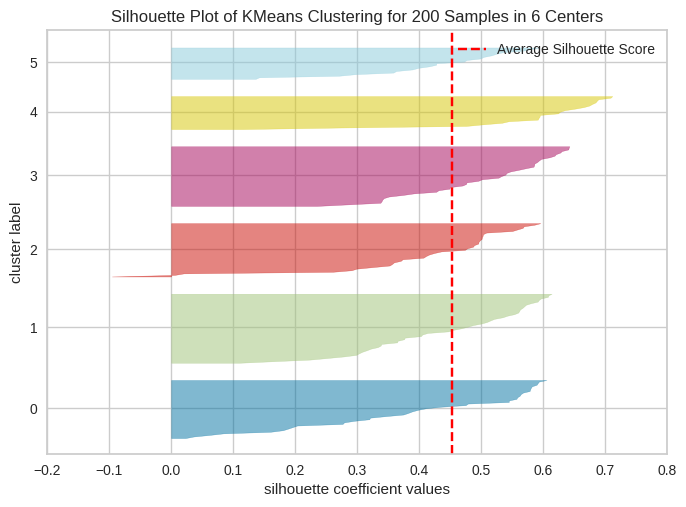

In [36]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

## **4.2 DBSCAN**


### **4-2-1. 설명**
- "Density-Based Spatial Clustering of Applications with Noise"의 약어
- 핵심 아이디어
  - 밀도가 높은 영역의 개념을 중심으로 하고 있음
  - 자연적인 클러스터는 밀도가 높게 위치한 점들로 구성되어 있다는 가정을 기반으로 함
- 주요 매개변수
  - Eps(ε): 거리
  - MinPts: 거리 Eps 내의 최소 점 수
- 거리 측정 방법은 선택적으로 사용자에 의해 지정될 수 있지만, 일반적으로 scikit-learn과 같이 유클리드 거리로 구현

- "밀도가 높은 영역"은 따라서 모든 점들 간의 거리 Eps 내에 최소한의 점 수로 생성됨
  - 해당 거리 내에 있지만 최소한의 다른 점과 가깝지 않은 점들은 "경계 점"으로 처리
  - 나머지는 잡음 또는 이상점임

- DBSCAN의 장/단점
  - 장점:
    - eps 및 MinPts 매개변수를 기반으로 클러스터 수를 자동으로 찾음
    - 길쭉한 클러스터나 다른 클러스터로 둘러싸인 클러스터와 같이 K-Means와 달리 항상 볼록한 클러스터를 구별할 수 있음
    - 이상점을 감지할 수 있음
  - 단점:
    - 각 점에 대한 이웃 조회를 실행해야 한 => 평균적으로 O(n log(n))의 높은 계산 비용이 요구됨
    - 다양한 밀도를 갖는 클러스터를 잘 식별하지 못함



### **4.2.2. 적용**

In [37]:
from sklearn.cluster import DBSCAN

#### **eps, minpts 조합 확인하기**

In [41]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps
min_samples = np.arange(3,10) # min_samples

DBSCAN_params = list(product(eps_values, min_samples))

#### **생성된 군집 개수 확인하기**

In [39]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

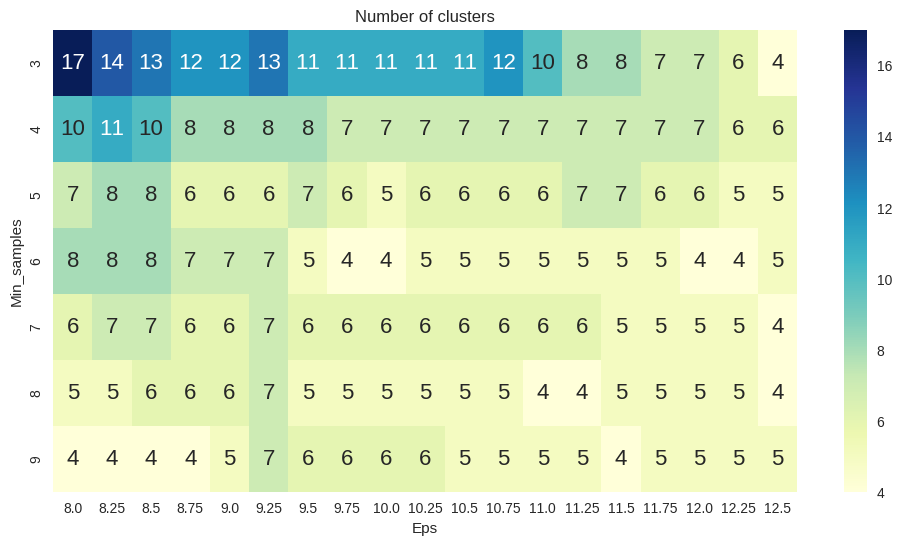

In [40]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

- 클러스터 수가 17에서 4까지 다양하게 나타남
  - 그러나 대부분의 조합은 4에서 7개의 클러스터를 가짐
- 구체적인 선택을 위해 실루엣 계수 등을 활용

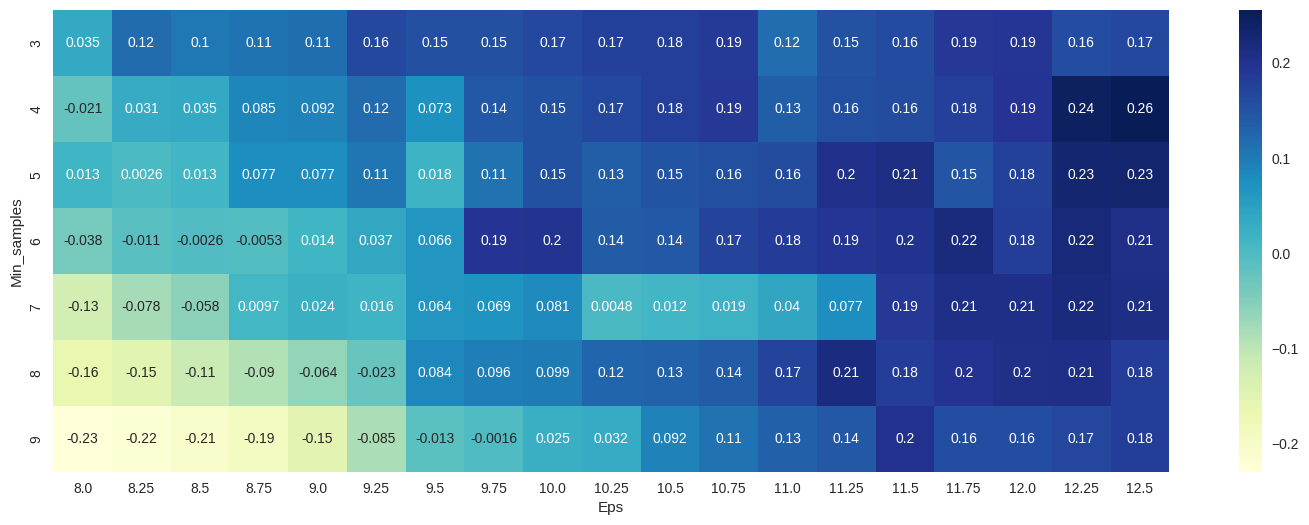

In [42]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

- `eps`=12.5 and `min_samples`=4에서 최대가 됨

In [43]:
## 최적화 된 알고리즘으로 군집화

DBS_clustering = DBSCAN(eps = 12.5, min_samples = 4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

#### **클러스터 크기 확인하기**

In [44]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


- 이상점 클러스터 (-1)를 포함하여 5개의 클러스터를 생성함
- 클러스터 0부터 4까지의 크기는 다양함
  - 일부 클러스터에는 4개 또는 8개의 관측값만 포함되어 있음
  - 18개의 이상점이 있음

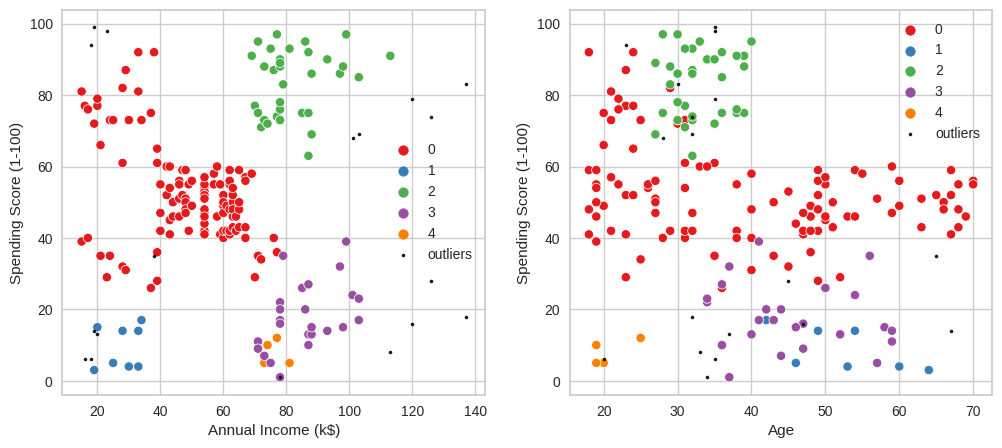

In [46]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

- 몇 개의 이상치가 존재함을 확인할 수 있음

## **4.3 Affinity Propagation**


### **4-3-1. 설명**

- 데이터 포인트 간에 메시지를 주고받는 개념을 기반으로 구축됨
  - 메시지는 두 점이 서로 얼마나 유사하며 서로의 대표가 될 수 있는지 측정하는 방법이며, 알고리즘이 스스로 최적의 클러스터 수를 찾음
  - 이는 수렴할 때까지 반복하는 횟수인 T와 샘플 수인 n에 대한 O(n²T)의 높은 시간 복잡도 비용을 의미
- AP는 초기화 기준에 민감하지 않음
- 주요 매개변수
  - `Preference`: 음수, 얼마나 많은 대표점이 사용되는지를 제어
  - `Damping factor`: 메시지 업데이트 시 숫자 진동을 방지


### **4-3-2. 적용**

In [47]:
from sklearn.cluster import AffinityPropagation

In [48]:
no_of_clusters = [] # 클러스터의 개수
preferences = range(-20000,-5000,100) # 임의로 선택된 범위
af_sil_score = [] # 실루엣 계수

for p in preferences:
    AF = AffinityPropagation(preference = p, max_iter = 200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score],
                          index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by = 'sil_score', ascending = False).head() # 최적의 5개 점수를 출력

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning:

Affinity propagation did not converge, this model may return degenerate cluster centers and labels.



,preference,clusters,sil_score
82,-11800.0,6.0,0.451649
27,-17300.0,6.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,6.0,0.451440
28,-17200.0,6.0,0.451440


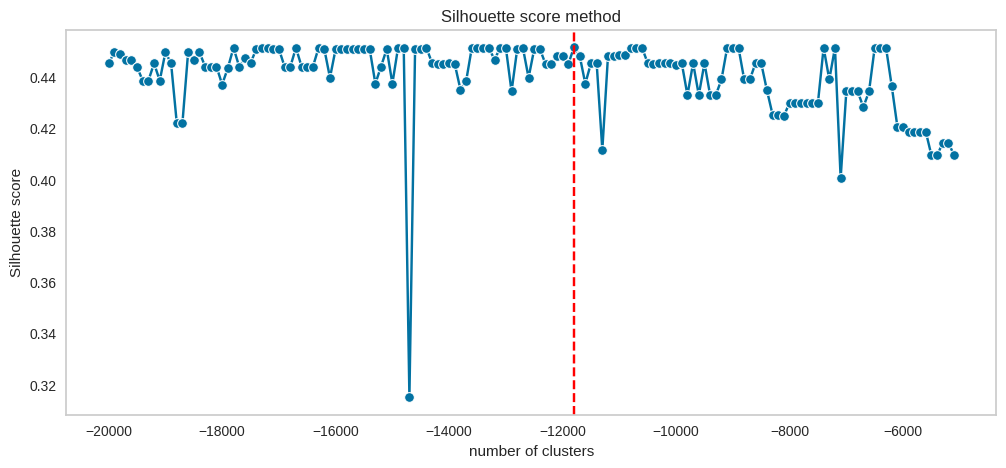

In [50]:
## 시각화

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x = preferences, y = af_sil_score, marker = 'o', ax = ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()

In [51]:
## 군집화

AF = AffinityPropagation(preference=-11800).fit(X_numerics)

In [52]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points

In [53]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


- 각 클러스터 간의 데이터 수는 대체로 균일함

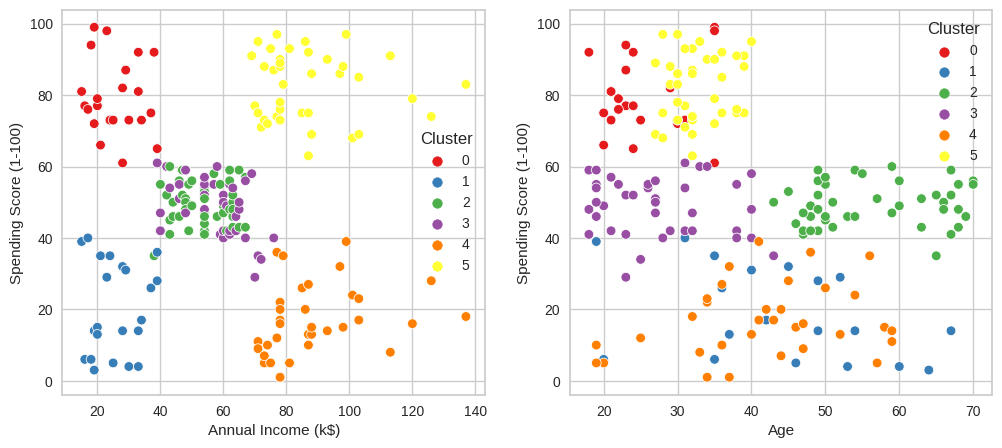

In [55]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=AF_clustered,
                         hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

- KMean 알고리즘과 비슷한 군집화 양상을 보임을 확인할 수 있다.

# **5. 비교 & 결론**

**KMeans(군집 개수: 5개)**

In [ ]:
fig1.suptitle('K-Means', fontsize=16)
fig1

**KMeans(군집 개수: 6개)**

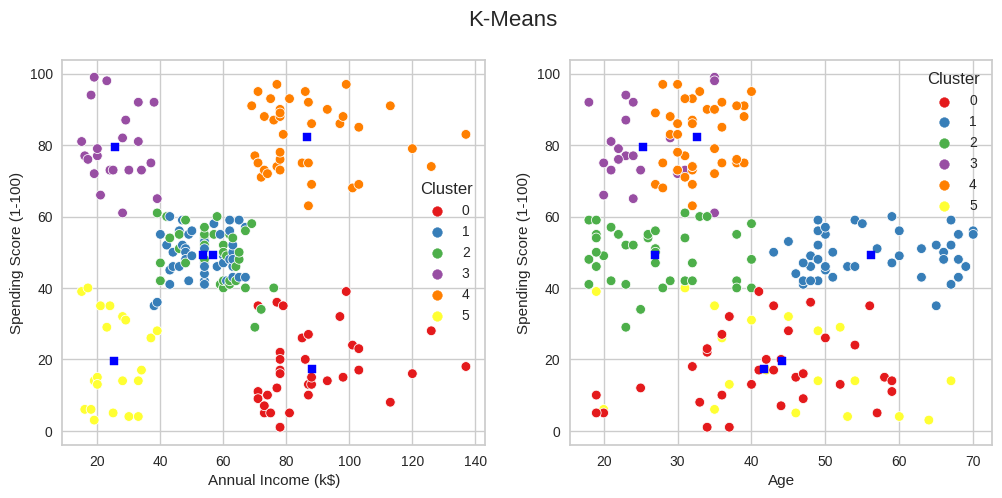

In [57]:
fig11.suptitle('K-Means', fontsize=16)
fig11

**DBSCAN**

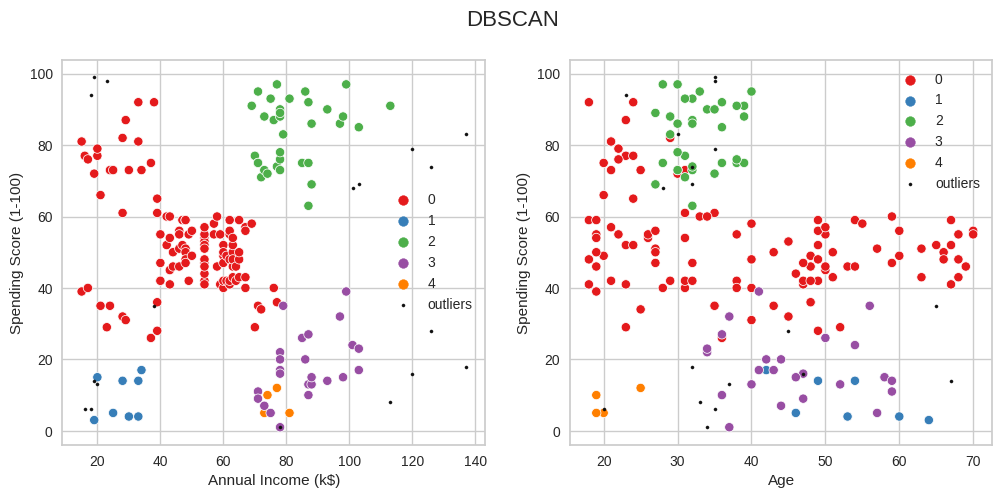

In [58]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

**AP**

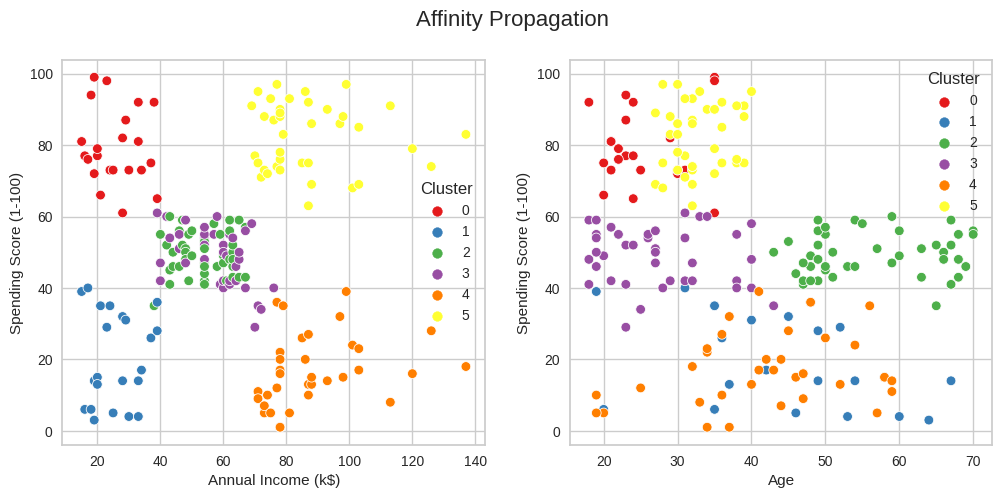

In [59]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3

In [60]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size,AF_size
Cluster,,,
0,35.0,112.0,22.0
1,45.0,8.0,22.0
2,38.0,34.0,44.0
3,22.0,24.0,39.0
4,39.0,4.0,34.0
5,21.0,NaN,39.0
-1,NaN,18.0,NaN


- `DBSCAN`은 합리적인 클러스터를 생성하지 못한 것으로 나타남
  - DBSCAN은 점들의 밀도를 기반으로 클러스터를 찾으려고 시도하기 때문임
  - 만약 우리의 클러스터 중 하나가 다른 클러스터보다 밀도가 낮다면, DBSCAN은 가장 밀도가 낮은 그룹을 클러스터로 인식하지 못하여 최적이 아닌 결과를 생성할 것임
- 반면에 `K-Means`와 `Affinity Propagation` 알고리즘은 합리적인 **6개**의 클러스터를 생성함